# Курсовой проект для курса "Python для Data Science"

_**Исполнитель:**_ Китаев Сергей Дмитриевич

### Исходные данные (файлы):
train.csv  
test.csv

### Описание датасета:
**Id** - идентификационный номер квартиры  
**DistrictId** - идентификационный номер района  
**Rooms** - количество комнат  
**Square** - площадь  
**LifeSquare** - жилая площадь  
**KitchenSquare** - площадь кухни  
**Floor** - этаж  
**HouseFloor** - количество этажей в доме  
**HouseYear** - год постройки дома  
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности  
**Social_1, Social_2, Social_3** - социальные показатели местности  
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья  
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров  
**Price** - цена квартиры  

### ***

### Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).  
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).  
  
_**Целевая переменная:**_ Price  
  
_**Метрика качества:**_ R2 - коэффициент детерминации (sklearn.metrics.r2_score)

### ***

##### Требования к решению:
1. R2 > 0.6  
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb  
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv  
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

##### Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

# Решение

##### Импорт библиотек и настройка окружения

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Загрузка и просмотр данных

### ***

### train.csv

In [3]:
df_train = pd.read_csv('train.csv', index_col='Id')

In [4]:
df_train.sort_values(by=['Id'], inplace=True)
df_train

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
0               0    1.0  109.144492   84.613939           15.0      6   
2               2    1.0   34.472263   16.069376            5.0      5   
5               5    3.0   57.607965   38.955672            5.0      3   
6               6    1.0   42.466813   40.010160            1.0     14   
10              6    3.0   75.888156   78.324716            1.0     11   
...           ...    ...         ...         ...            ...    ...   
16793          53    1.0   33.258974   19.576423            6.0      6   
16794          29    2.0   45.280336   32.370920            5.0      8   
16796          46    1.0   33.013935   22.277019            6.0      4   
16797          94    3.0   77.325275   48.101669           10.0      7   
16798          22    1.0   39.956966   19.874715            8.0      2   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
0            15.0       2011   0.319809         B         B        25   
2            18.0       1969   0.000000         B         B        33   
5             9.0       1974   0.150818         B         B        16   
6            17.0       2014   0.243205         B         B         5   
10           17.0       2014   0.243205         B         B         5   
...           ...        ...        ...       ...       ...       ...   
16793        12.0       1972   0.313925         B         B        22   
16794         8.0       1967   0.069660         B         B        31   
16796         9.0       1987   0.188784         B         B        31   
16797        16.0       1982   0.282798         B         B        33   
16798        17.0       1989   0.133215         B         B        49   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
0          4756        16        2857.0            5        8       B   
2          7425         1           NaN            2        5       B   
5          3433         4        2643.0            4        5       B   
6          1564         0         540.0            0        0       B   
10         1564         0         540.0            0        0       B   
...         ...       ...           ...          ...      ...     ...   
16793      4625        11        3855.0            2       10       B   
16794      6119         4           NaN            1        2       B   
16796      6137         4           NaN            0        1       B   
16797      8667         2           NaN            0        6       B   
16798     11395         3        1406.0            3        4       A   

               Price  
Id                    
0      289034.391871  
2      174548.966339  
5      258091.883679  
6      127196.762031  
10     218500.747041  
...              ...  
16793  201307.933649  
16794  239503.727371  
16796  168233.016477  
16797  354690.491271  
16798  183467.407815  

[10000 rows x 19 columns]

##### Обзор заголовочных данных:  
**Id** - в отсортированном поле Id значения следуют не по порядку, возможно это несбалансированная выборка;  
**Healthcare_1** - в поле присутствуют пропуски данных.  
Поля связанные с экологией и магазинами содержат буквенные значения, потребуется замена числовыми значениями.  
Содержит 10000 строк и 19 столбцов, включая столбец **Price** - значения целевой переменной

### ***

### test.csv

In [5]:
df_test = pd.read_csv('test.csv', index_col='Id')

In [6]:
df_test.sort_values(by=['Id'], inplace=True)

In [7]:
df_test

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
1               1    2.0  83.061098   83.830248            0.0     10   
3               3    1.0  30.185483   14.810573            6.0      4   
4               4    1.0  37.294669   17.165597            8.0      9   
8               8    3.0  83.930342   50.049315            8.0      4   
9               6    1.0  38.800420   42.560690            1.0      3   
...           ...    ...        ...         ...            ...    ...   
16787          55    3.0  78.688848   44.679276            8.0     12   
16788          74    1.0  48.763155   47.209738            1.0      7   
16789         128    2.0  56.856093   30.515712            8.0      9   
16792          26    1.0  36.802779   22.481885            5.0      4   
16795           3    2.0  42.366967   30.429377            5.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1            22.0       1977   0.007122         B         B         1   
3             9.0       1970   0.265089         B         B        37   
4             9.0       1970   0.327018         B         B        12   
8            12.0       2007   0.092291         B         B        21   
9            17.0       2017   0.243205         B         B         5   
...           ...        ...        ...       ...       ...       ...   
16787        14.0       1989   0.041365         B         B        31   
16788        10.0       2015   0.075779         B         B         6   
16789        14.0       1998   0.041116         B         B        53   
16792         9.0       1966   0.000000         B         B        36   
16795         5.0       1968   0.265089         B         B        37   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
Id                                                                     
1           264         0           NaN            0        1       B  
3          5288         0        1937.0            3        2       B  
4          2270        23        2500.0            1        0       B  
8          4346         2         165.0            1        2       B  
9          1564         0         540.0            0        0       B  
...         ...       ...           ...          ...      ...     ...  
16787      5569         0           NaN            1        4       B  
16788      1437         3           NaN            0        2       B  
16789     14892         4           NaN            1        4       B  
16792      6714         2        2672.0            0        2       B  
16795      5288         0        1937.0            3        2       B  

[5000 rows x 18 columns]

##### Обзор заголовочных данных:
test.csv - сгенерирован из той же выборки, что и набор данных train.csv.  
Содержит 5000 строк и 18 столбцов.

### ***

### Детальный разбор данных

### Тренеровочный набор данных (train dataset)

In [8]:
df_train.shape

(10000, 19)

##### Набор данных содержит 10000 записей (объектов) и 19 полей (признаков)

In [9]:
df_train.describe().T.round(2)

count       mean        std       min        25%        50%  \
DistrictId     10000.0      50.40      43.59      0.00      20.00      36.00   
Rooms          10000.0       1.89       0.84      0.00       1.00       2.00   
Square         10000.0      56.32      21.06      1.14      41.77      52.51   
LifeSquare      7887.0      37.20      86.24      0.37      22.77      32.78   
KitchenSquare  10000.0       6.27      28.56      0.00       1.00       6.00   
Floor          10000.0       8.53       5.24      1.00       4.00       7.00   
HouseFloor     10000.0      12.61       6.78      0.00       9.00      13.00   
HouseYear      10000.0    3990.17  200500.26   1910.00    1974.00    1977.00   
Ecology_1      10000.0       0.12       0.12      0.00       0.02       0.08   
Social_1       10000.0      24.69      17.53      0.00       6.00      25.00   
Social_2       10000.0    5352.16    4006.80    168.00    1564.00    5285.00   
Social_3       10000.0       8.04      23.83      0.00       0.00       2.00   
Healthcare_1    5202.0    1142.90    1021.52      0.00     350.00     900.00   
Helthcare_2    10000.0       1.32       1.49      0.00       0.00       1.00   
Shops_1        10000.0       4.23       4.81      0.00       1.00       3.00   
Price          10000.0  214138.86   92872.29  59174.78  153872.63  192269.64   

                     75%          max  
DistrictId         75.00       209.00  
Rooms               2.00        19.00  
Square             65.90       641.07  
LifeSquare         45.13      7480.59  
KitchenSquare       9.00      2014.00  
Floor              12.00        42.00  
HouseFloor         17.00       117.00  
HouseYear        2001.00  20052011.00  
Ecology_1           0.20         0.52  
Social_1           36.00        74.00  
Social_2         7227.00     19083.00  
Social_3            5.00       141.00  
Healthcare_1     1548.00      4849.00  
Helthcare_2         2.00         6.00  
Shops_1             6.00        23.00  
Price          249135.46    633233.47

##### Обзор объектов  
**LifeSquare** - признак содержит 7887 значений (78,8 %); 21,2 % записей - пропущено  
**Healthcare_1** - признак содержит 5202 значений (52,0 %); 48,0 % записей - пропущено  
**KitchenSquare** - параметр **max** содержит неправдоподобное значение  
**HouseYear** - параметр **max** содержит неправдоподобное значение

In [10]:
df_train['HouseYear'].max()

20052011

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price 

#### Обзор объектов
**LifeSquare** - пропуск данных  
**Healthcare_1** - пропуск данных  
**Ecology_2** - содержит объекты типа object  
**Ecology_3** - содержит объекты типа object  
**Shops_2** - содержит объекты типа object  

In [12]:
df_train.Ecology_2.value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [13]:
df_train.Ecology_3.value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
df_train.Shops_2.value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Тестовый набор данных (test dataset)

In [15]:
df_test.shape

(5000, 18)

##### Набор данных содержит 5000 записей (объектов) и 18 полей (признаков)

In [16]:
df_test.describe().T.round(2)

count     mean      std      min      25%      50%      75%  \
DistrictId     5000.0    51.28    44.18     0.00    21.00    37.00    77.00   
Rooms          5000.0     1.91     0.84     0.00     1.00     2.00     2.00   
Square         5000.0    56.45    19.09     1.38    41.91    52.92    66.29   
LifeSquare     3959.0    36.16    17.83     0.33    23.09    32.93    45.17   
KitchenSquare  5000.0     5.98     9.95     0.00     1.00     6.00     9.00   
Floor          5000.0     8.63     5.48     1.00     4.00     7.00    12.00   
HouseFloor     5000.0    12.60     6.79     0.00     9.00    12.00    17.00   
HouseYear      5000.0  1984.39    18.57  1908.00  1973.00  1977.00  2000.00   
Ecology_1      5000.0     0.12     0.12     0.00     0.02     0.07     0.20   
Social_1       5000.0    24.93    17.53     0.00     6.00    25.00    36.00   
Social_2       5000.0  5406.90  4026.61   168.00  1564.00  5285.00  7287.00   
Social_3       5000.0     8.26    23.86     0.00     0.00     2.00     5.00   
Healthcare_1   2623.0  1146.66  1044.74     0.00   325.00   900.00  1548.00   
Helthcare_2    5000.0     1.32     1.48     0.00     0.00     1.00     2.00   
Shops_1        5000.0     4.24     4.78     0.00     1.00     3.00     6.00   

                    max  
DistrictId       212.00  
Rooms             17.00  
Square           223.45  
LifeSquare       303.07  
KitchenSquare    620.00  
Floor             78.00  
HouseFloor        99.00  
HouseYear       2020.00  
Ecology_1          0.52  
Social_1          74.00  
Social_2       19083.00  
Social_3         141.00  
Healthcare_1    4849.00  
Helthcare_2        6.00  
Shops_1           23.00

##### Обзор объектов  
**LifeSquare** - признак содержит 3959 значений (79,2 %); 20,8 % записей - пропущено  
**Healthcare_1** - признак содержит 2623 значений (52,6 %); 47,4 % записей - пропущено

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 16795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: floa

#### Обзор объектов
**LifeSquare** - пропуск данных  
**Healthcare_1** - пропуск данных  
**Ecology_2** - содержит объекты типа object  
**Ecology_3** - содержит объекты типа object  
**Shops_2** - содержит объекты типа object  

### Заполнение пропусков данных в признаках

**Предположение 1:** наибольшее влияние на стоимость жилья будет оказывать в большей степени площадь недвижимости. И, возможно, экологические показатели. Соответственно, терять такой параметра как LifeSquare не хотелось бы. Попытаемся заполнить его значениями. Вычислим LifeSquare относительно общей площади (Square) и площади кухни (KitchenSquare).

**Предположение 2:** такой параметр, как Healthcare_1, что в тренеровочной выборке, что в тестовой содержит всего около 50 % значений, относительно всего объема выборки. Возможно стоит попробовать полностью исключить показатель.

### ***

Определим количество пропусков признаков

In [18]:
df_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Построим график распределения **Square** относительно **LifeSquare + KitchenSquare**

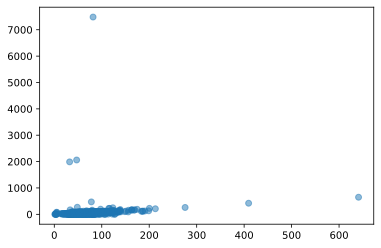

In [19]:
plt.scatter(df_train['Square'], df_train['LifeSquare'] + df_train['KitchenSquare'], alpha = 0.5)

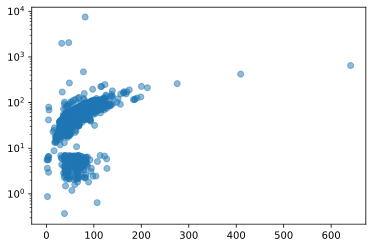

In [20]:
plt.scatter(df_train['Square'], df_train['LifeSquare'] + df_train['KitchenSquare'], alpha = 0.5)
plt.yscale('log')

В данных присутствуют выбросы. Сначала отредактируем выбросы, затем заполним пропущенные значения **LifeSquare** результатом вычисления **Square - KitchenSquare**

In [21]:
df_dif_Square_LifeSquare = df_train.loc[(df_train['LifeSquare'] + df_train['KitchenSquare'] - df_train['Square']) > 1]

In [22]:
df_dif_Square_LifeSquare
# количество объектов LifeSquare + KitchenSquare > Square более 1 м

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
10              6    3.0  75.888156   78.324716            1.0     11   
41             30    2.0  59.015896   59.439082           12.0      5   
46             25    2.0  54.190350   56.660550            1.0     15   
47              2    2.0  45.053898   47.329346            5.0      2   
58             36    1.0  34.776160   33.124456            6.0      3   
...           ...    ...        ...         ...            ...    ...   
16657           6    2.0  66.129214   68.749463            1.0     17   
16725          45    2.0  59.168852   61.026232            1.0     10   
16759          27    1.0  38.179101   38.121459           10.0     11   
16772         109    3.0  32.795221   36.659413            6.0      2   
16781          27    1.0  36.138409   36.710539           36.0     19   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
10           17.0       2014   0.243205         B         B         5   
41            5.0       2016   0.000078         B         B        22   
46            1.0       2017   0.069753         B         B        53   
47            5.0       1967   0.000000         B         B        33   
58            5.0       1961   0.087619         B         B         8   
...           ...        ...        ...       ...       ...       ...   
16657        17.0       2015   0.243205         B         B         5   
16725        10.0       2018   0.195781         B         B        23   
16759        20.0       2017   0.011654         B         B         4   
16772         9.0       1979   0.136330         B         B        30   
16781        19.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
10         1564         0         540.0            0        0       B   
41         6398       141        1046.0            3       23       B   
46        13670         4           NaN            1       11       B   
47         7425         1           NaN            2        5       B   
58         1497         5           NaN            1        0       B   
...         ...       ...           ...          ...      ...     ...   
16657      1564         0         540.0            0        0       B   
16725      5212         6           NaN            3        2       B   
16759       915         0           NaN            0        0       B   
16772      6141        10         262.0            3        6       B   
16781       629         1           NaN            0        0       A   

               Price  
Id                    
10     218500.747041  
41     126281.142781  
46     236862.263910  
47     196512.596034  
58     146948.277783  
...              ...  
16657  192752.043487  
16725  321927.393542  
16759  113430.189627  
16772  173602.708629  
16781  131742.536281  

[700 rows x 19 columns]

In [23]:
df_dif_Square_LifeSquare.sort_values(by=['LifeSquare'], ascending=False)

DistrictId  Rooms      Square   LifeSquare  KitchenSquare  Floor  \
Id                                                                        
16550          27    3.0   81.694417  7480.592129            1.0      9   
11602          30    2.0  641.065193   638.163193           10.0     20   
15886          85    3.0   78.059331   461.463614           10.0     12   
2307          102    1.0  409.425181   410.639749           10.0      4   
14990          23    2.0   48.449873   263.542020            5.0      6   
...           ...    ...         ...          ...            ...    ...   
7657           38    1.0    4.502784     4.618547            1.0     28   
10202           6    1.0    2.596351     4.604943            1.0      3   
14786           1    1.0    1.136859     4.525736            1.0      3   
15744          34    1.0    1.988943     2.642219            1.0     21   
448            48    1.0   41.186904     1.626502           41.0      2   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
16550        17.0       2016   0.017647         B         B         2   
11602        19.0       2019   0.000078         B         B        22   
15886        16.0       1998   0.037178         B         B        52   
2307          4.0       2016   0.238617         B         B        26   
14990         5.0       1972   0.075779         B         B         6   
...           ...        ...        ...       ...       ...       ...   
7657          1.0       1977   0.060753         B         B        15   
10202        25.0       2014   0.243205         B         B         5   
14786         1.0       1977   0.007122         B         B         1   
15744         4.0       1977   0.069753         B         B        53   
448           1.0       1977   0.041125         B         B        46   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
16550       469         0           NaN            0        0       B   
11602      6398       141        1046.0            3       23       B   
15886     11217         1        2300.0            1        7       B   
2307       3889         6         705.0            3        6       B   
14990      1437         3           NaN            0        2       B   
...         ...       ...           ...          ...      ...     ...   
7657       2787         2         520.0            0        7       B   
10202      1564         0         540.0            0        0       B   
14786       264         0           NaN            0        1       B   
15744     13670         4           NaN            1       11       B   
448        9515         5           NaN            1       10       B   

               Price  
Id                    
16550  217357.492366  
11602  133529.681562  
15886  394253.299978  
2307    90470.430830  
14990  141780.231857  
...              ...  
7657   483283.488083  
10202  137597.601458  
14786  181434.825589  
15744  458378.777006  
448    216882.265408  

[700 rows x 19 columns]

In [24]:
print(f'{df_dif_Square_LifeSquare.shape[0] / df_train.shape[0] * 100 :.2f} %')

# количество объектов LifeSquare + KitchenSquare > Square более 1 м

7.00 %


In [25]:
df_train[df_train['Square'] < 10]

DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
1748           88    2.0  5.497061   67.628717            1.0     24   
3224           27    0.0  2.377248    0.873147            0.0      1   
4504           27    3.0  4.390331    5.610772            1.0      8   
6782           45    1.0  2.954309    5.257278            1.0      3   
7657           38    1.0  4.502784    4.618547            1.0     28   
9487            5    1.0  5.129222    5.549458            1.0      1   
10202           6    1.0  2.596351    4.604943            1.0      3   
10527          27    1.0  4.380726   40.805837            1.0     10   
11526          27    1.0  4.633498    1.969969            1.0     18   
13265           1    3.0  4.823679   79.767964            0.0      6   
14786           1    1.0  1.136859    4.525736            1.0      3   
15744          34    1.0  1.988943    2.642219            1.0     21   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1748         22.0       1977   0.127376         B         B        43   
3224          0.0       1977   0.017647         B         B         2   
4504         19.0       2016   0.211401         B         B         9   
6782          1.0       1977   0.195781         B         B        23   
7657          1.0       1977   0.060753         B         B        15   
9487          1.0       1977   0.150818         B         B        16   
10202        25.0       2014   0.243205         B         B         5   
10527        17.0       2013   0.211401         B         B         9   
11526         1.0       1977   0.011654         B         B         4   
13265        17.0       1977   0.007122         B         B         1   
14786         1.0       1977   0.007122         B         B         1   
15744         4.0       1977   0.069753         B         B        53   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
1748       8429         3           NaN            3        9       B   
3224        469         0           NaN            0        0       B   
4504       1892         0           NaN            0        1       B   
6782       5212         6           NaN            3        2       B   
7657       2787         2         520.0            0        7       B   
9487       3433         4        2643.0            4        5       B   
10202      1564         0         540.0            0        0       B   
10527      1892         0           NaN            0        1       B   
11526       915         0           NaN            0        0       B   
13265       264         0           NaN            0        1       B   
14786       264         0           NaN            0        1       B   
15744     13670         4           NaN            1       11       B   

               Price  
Id                    
1748   412511.088764  
3224   126596.941798  
4504   161379.067034  
6782   438005.182323  
7657   483283.488083  
9487   369472.403061  
10202  137597.601458  
10527   97560.720383  
11526  107604.269441  
13265  237716.681261  
14786  181434.825589  
15744  458378.777006

Объектов с показателем **Square** < 10 не так много, относительно всей выборки. Из них 3 объекта в показателе **LifeSquare** содержат правдоподобные значения площади

In [26]:
df_train[df_train['LifeSquare'] < 5]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
34              6    3.0  78.380053    4.003157            1.0     23   
88             34    4.0  93.904994    2.078688            1.0     14   
363            27    2.0  59.715762    1.595943            0.0      2   
448            48    1.0  41.186904    1.626502           41.0      2   
464            25    2.0  66.012592    3.529646            1.0     15   
...           ...    ...        ...         ...            ...    ...   
16150          34    3.0  83.590446    4.030483            1.0     16   
16176           6    2.0  64.998310    1.974968            1.0     13   
16360          48    1.0  40.915247    4.309547            1.0     20   
16501          22    2.0  64.186016    2.484378            1.0     10   
16779          27    3.0  51.991064    4.896202            1.0     22   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
34           25.0       2019   0.243205         B         B         5   
88            1.0       2018   0.069753         B         B        53   
363           0.0       2018   0.072158         B         B         2   
448           1.0       1977   0.041125         B         B        46   
464          25.0       1977   0.069753         B         B        53   
...           ...        ...        ...       ...       ...       ...   
16150         1.0       2015   0.069753         B         B        53   
16176        17.0       2015   0.243205         B         B         5   
16360         1.0       2014   0.041125         B         B        46   
16501        10.0       2017   0.118537         B         B        30   
16779        25.0       1977   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
34         1564         0         540.0            0        0       B   
88        13670         4           NaN            1       11       B   
363         629         1           NaN            0        0       A   
448        9515         5           NaN            1       10       B   
464       13670         4           NaN            1       11       B   
...         ...       ...           ...          ...      ...     ...   
16150     13670         4           NaN            1       11       B   
16176      1564         0         540.0            0        0       B   
16360      9515         5           NaN            1       10       B   
16501      6207         1        1183.0            1        0       B   
16779       629         1           NaN            0        0       A   

               Price  
Id                    
34     206647.245666  
88     367368.954516  
363    189331.645263  
448    216882.265408  
464    252748.663126  
...              ...  
16150  315641.205620  
16176  175065.504600  
16360  209978.966130  
16501  187799.877054  
16779  174687.566186  

[162 rows x 19 columns]

In [27]:
df_train[df_train['KitchenSquare'] <= 1]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
6               6    1.0   42.466813   40.010160            1.0     14   
10              6    3.0   75.888156   78.324716            1.0     11   
28              9    2.0  604.705972         NaN            1.0     17   
29             22    3.0   73.930217         NaN            1.0      4   
32             25    3.0   88.406762         NaN            1.0     21   
...           ...    ...         ...         ...            ...    ...   
16765          56    2.0   92.832174   88.750646            1.0      3   
16766          58    1.0   49.286054         NaN            1.0      5   
16777          52    2.0   54.496529         NaN            1.0     15   
16779          27    3.0   51.991064    4.896202            1.0     22   
16782          34    2.0   76.434255   74.887763            1.0     23   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
6            17.0       2014   0.243205         B         B         5   
10           17.0       2014   0.243205         B         B         5   
28           18.0       1977   0.161532         B         B        25   
29           17.0       1977   0.118537         B         B        30   
32           25.0       2019   0.069753         B         B        53   
...           ...        ...        ...       ...       ...       ...   
16765        21.0       2017   0.035145         B         B        42   
16766         3.0       1977   0.437885         B         B        23   
16777        17.0       1977   0.371149         B         B        34   
16779        25.0       1977   0.072158         B         B         2   
16782        23.0       2015   0.069753         B         B        53   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
6          1564         0         540.0            0        0       B   
10         1564         0         540.0            0        0       B   
28         5648         1          30.0            2        4       B   
29         6207         1        1183.0            1        0       B   
32        13670         4           NaN            1       11       B   
...         ...       ...           ...          ...      ...     ...   
16765      9292         3        2620.0            0        3       B   
16766      5735         3        1084.0            0        5       B   
16777      7065         1         750.0            2        5       B   
16779       629         1           NaN            0        0       A   
16782     13670         4           NaN            1       11       B   

               Price  
Id                    
6      127196.762031  
10     218500.747041  
28     187717.242538  
29     202717.174620  
32     323536.766838  
...              ...  
16765  179801.566365  
16766  122670.471536  
16777  150775.310273  
16779  174687.566186  
16782  423527.958167  

[3157 rows x 19 columns]

In [28]:
df_train['KitchenSquare'].value_counts(dropna=False)

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
32.0         2
30.0         2
25.0         2
43.0         2
51.0         2
58.0         2
37.0         2
112.0        2
96.0         1
40.0         1
48.0         1
73.0         1
2014.0       1
35.0         1
75.0         1
63.0         1
31.0         1
27.0         1
84.0         1
39.0         1
53.0         1
1970.0       1
36.0         1
72.0         1
26.0         1
62.0         1
29.0         1
60.0         1
78.0         1
123.0        1
21.0         1
42.0         1
54.0         1
66.0         1
23.0         1
Name: KitchenSquare, dtype: int64

Два значения 1970.0 и 2014.0 больше похожи на года, стоит проверить эти объекты.  
Возможно объекты недвижимости с площадью кухни < 1.0 являются корректными, например это аппартаменты. Поэтому дополнительных манипуляций с этим признаком делать больше не будем.


In [29]:
df_train.loc[df_train['KitchenSquare'] > 1000]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
14656          62    1.0  47.100719   46.447960         2014.0      4   
14679          81    1.0  32.276663   19.278394         1970.0      6   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
14656         1.0       2014   0.072158         B         B         2   
14679         1.0       1977   0.006076         B         B        30   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
14656       629         1           NaN            0        0       A   
14679      5285         0         645.0            6        6       B   

               Price  
Id                    
14656  108337.484207  
14679  105539.556275

Заменим значения **Kitchen** на разницу **Square** и **LifeSquare**

In [30]:
index = df_train.loc[df_train['KitchenSquare'] > 1000].index

In [31]:
df_train.loc[index, 'KitchenSquare'] = df_train.loc[index]['Square'] - df_train.loc[index]['LifeSquare']

In [32]:
df_train.loc[index, ['Square', 'LifeSquare', 'KitchenSquare']]

Square  LifeSquare  KitchenSquare
Id                                         
14656  47.100719   46.447960       0.652759
14679  32.276663   19.278394      12.998269

Найдем значения признаков **LifeSquare** значительно больших признака **Square**

In [33]:
df_train[(df_train['Square'] < 10) & (df_train['LifeSquare'] > df_train['Square'] * 2)]

DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
1748           88    2.0  5.497061   67.628717            1.0     24   
10527          27    1.0  4.380726   40.805837            1.0     10   
13265           1    3.0  4.823679   79.767964            0.0      6   
14786           1    1.0  1.136859    4.525736            1.0      3   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1748         22.0       1977   0.127376         B         B        43   
10527        17.0       2013   0.211401         B         B         9   
13265        17.0       1977   0.007122         B         B         1   
14786         1.0       1977   0.007122         B         B         1   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
1748       8429         3           NaN            3        9       B   
10527      1892         0           NaN            0        1       B   
13265       264         0           NaN            0        1       B   
14786       264         0           NaN            0        1       B   

               Price  
Id                    
1748   412511.088764  
10527   97560.720383  
13265  237716.681261  
14786  181434.825589

Заменим значения **Square** значениями из **LifeSquare + KitchenSquare** 

In [34]:
index = df_train[(df_train['Square'] < 10) & (df_train['LifeSquare'] > df_train['Square'] * 2)].index

In [35]:
df_train.loc[index, 'Square'] = df_train.loc[index]['LifeSquare'] + df_train.loc[index]['KitchenSquare']

In [36]:
df_train.loc[index]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
1748           88    2.0  68.628717   67.628717            1.0     24   
10527          27    1.0  41.805837   40.805837            1.0     10   
13265           1    3.0  79.767964   79.767964            0.0      6   
14786           1    1.0   5.525736    4.525736            1.0      3   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1748         22.0       1977   0.127376         B         B        43   
10527        17.0       2013   0.211401         B         B         9   
13265        17.0       1977   0.007122         B         B         1   
14786         1.0       1977   0.007122         B         B         1   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
1748       8429         3           NaN            3        9       B   
10527      1892         0           NaN            0        1       B   
13265       264         0           NaN            0        1       B   
14786       264         0           NaN            0        1       B   

               Price  
Id                    
1748   412511.088764  
10527   97560.720383  
13265  237716.681261  
14786  181434.825589

In [37]:
df_train.loc[(df_train['LifeSquare'] - df_train['Square']) > 5]

DistrictId  Rooms     Square   LifeSquare  KitchenSquare  Floor  \
Id                                                                       
4071            6    3.0  75.203314    82.486992            1.0     13   
8961           27    1.0  33.398983   164.153360            6.0      3   
14990          23    2.0  48.449873   263.542020            5.0      6   
15886          85    3.0  78.059331   461.463614           10.0     12   
16550          27    3.0  81.694417  7480.592129            1.0      9   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
4071         25.0       2015   0.243205         B         B         5   
8961          5.0       1965   0.211401         B         B         9   
14990         5.0       1972   0.075779         B         B         6   
15886        16.0       1998   0.037178         B         B        52   
16550        17.0       2016   0.017647         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
4071       1564         0         540.0            0        0       B   
8961       1892         0           NaN            0        1       B   
14990      1437         3           NaN            0        2       B   
15886     11217         1        2300.0            1        7       B   
16550       469         0           NaN            0        0       B   

               Price  
Id                    
4071   211324.917957  
8961   104891.073757  
14990  141780.231857  
15886  394253.299978  
16550  217357.492366

Откорректируем выбросы **LifeSquare**

In [38]:
index = df_train.loc[(df_train['LifeSquare'] - df_train['Square']) > 5].index

In [39]:
df_train.loc[index, 'LifeSquare'] = df_train.loc[index, 'Square'] - df_train.loc[index, 'KitchenSquare']

In [40]:
df_train.loc[index]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
4071            6    3.0  75.203314   74.203314            1.0     13   
8961           27    1.0  33.398983   27.398983            6.0      3   
14990          23    2.0  48.449873   43.449873            5.0      6   
15886          85    3.0  78.059331   68.059331           10.0     12   
16550          27    3.0  81.694417   80.694417            1.0      9   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
4071         25.0       2015   0.243205         B         B         5   
8961          5.0       1965   0.211401         B         B         9   
14990         5.0       1972   0.075779         B         B         6   
15886        16.0       1998   0.037178         B         B        52   
16550        17.0       2016   0.017647         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
4071       1564         0         540.0            0        0       B   
8961       1892         0           NaN            0        1       B   
14990      1437         3           NaN            0        2       B   
15886     11217         1        2300.0            1        7       B   
16550       469         0           NaN            0        0       B   

               Price  
Id                    
4071   211324.917957  
8961   104891.073757  
14990  141780.231857  
15886  394253.299978  
16550  217357.492366

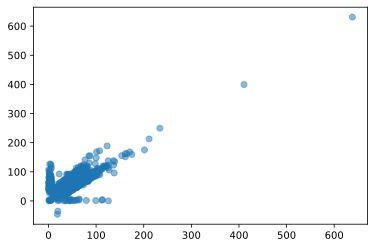

In [41]:
plt.scatter(df_train['LifeSquare'], df_train['Square'] - df_train['KitchenSquare'], alpha=0.5)

В выборке присутствуют объекты с площадью **LifeSquare** значительно меньше **Square** (сгруппированы вдоль оси y) - возможно такие объекы недвижимости актуальны для аппартаментов, и **LifeSquare** значительно больше **Square**, это возможно ошибочные значения.

In [42]:
df_train.loc[(df_train['LifeSquare'] + df_train['KitchenSquare'] - df_train['Square']) < -30]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
34              6    3.0   78.380053    4.003157            1.0     23   
88             34    4.0   93.904994    2.078688            1.0     14   
203            33    4.0  101.554252   22.630373            9.0      4   
300            31    2.0  106.427686   34.230415           32.0      4   
340           103    4.0  100.501409   59.413974           10.0      3   
...           ...    ...         ...         ...            ...    ...   
16583           6    1.0   39.182387    5.954610            1.0      4   
16641         111    4.0  117.201937   69.898092           14.0      4   
16642          27    1.0   51.623862   19.437756            1.0      8   
16739         144    3.0   89.306711   45.832465           12.0      5   
16779          27    3.0   51.991064    4.896202            1.0     22   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
34           25.0       2019   0.243205         B         B         5   
88            1.0       2018   0.069753         B         B        53   
203           5.0       1958   0.051942         B         B        17   
300          40.0       2013   0.151346         B         A        32   
340          14.0       2003   0.014423         B         B        19   
...           ...        ...        ...       ...       ...       ...   
16583        17.0       1977   0.243205         B         B         5   
16641         2.0       2017   0.093443         B         B        23   
16642         1.0       2016   0.017647         B         B         2   
16739        17.0       2007   0.306977         B         B        27   
16779        25.0       1977   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
34         1564         0         540.0            0        0       B   
88        13670         4           NaN            1       11       B   
203        4017         7         800.0            2        0       B   
300        5889        10         830.0            4        1       B   
340        3806         4           NaN            0        3       B   
...         ...       ...           ...          ...      ...     ...   
16583      1564         0         540.0            0        0       B   
16641      4635         5        3300.0            2        4       B   
16642       469         0           NaN            0        0       B   
16739      5148        14        1575.0            5        7       B   
16779       629         1           NaN            0        0       A   

               Price  
Id                    
34     206647.245666  
88     367368.954516  
203     82342.775873  
300    624549.354546  
340    593618.746096  
...              ...  
16583  127997.031085  
16641  197593.112769  
16642  142140.159208  
16739  564216.233300  
16779  174687.566186  

[352 rows x 19 columns]

In [43]:
df_train.loc[(df_train['Square'] - df_train['LifeSquare'] - df_train['KitchenSquare']) < -10]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
41             30    2.0   59.015896   59.439082           12.0      5   
99              1    1.0   46.451371   47.249044           10.0     13   
127            34    3.0   79.130550   83.470011           12.0     25   
299            27    2.0   66.787523   64.616662           60.0     14   
673            27    1.0   54.418214   51.498581           51.0     10   
...           ...    ...         ...         ...            ...    ...   
16270         113    1.0   78.410874   78.814606           11.0      7   
16395           2    3.0   79.722243   44.731219           72.0     12   
16408           9    1.0   40.226907   37.849083           19.0      8   
16568          27    4.0  200.334539  201.627361           25.0      1   
16781          27    1.0   36.138409   36.710539           36.0     19   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
41            5.0       2016   0.000078         B         B        22   
99           20.0       1977   0.007122         B         B         1   
127          23.0       2015   0.069753         B         B        53   
299          20.0       2015   0.017647         B         B         2   
673          17.0       2017   0.072158         B         B         2   
...           ...        ...        ...       ...       ...       ...   
16270         1.0       2018   0.050756         B         B        24   
16395        16.0       1987   0.130618         B         B        39   
16408        17.0       1993   0.161532         B         B        25   
16568         2.0       2013   0.041116         B         B        53   
16781        19.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
41         6398       141        1046.0            3       23       B   
99          264         0           NaN            0        1       B   
127       13670         4           NaN            1       11       B   
299         469         0           NaN            0        0       B   
673         629         1           NaN            0        0       A   
...         ...       ...           ...          ...      ...     ...   
16270      5469         1         145.0            0        1       B   
16395     10418         9         900.0            1        9       B   
16408      5648         1          30.0            2        4       B   
16568     14892         4           NaN            1        4       B   
16781       629         1           NaN            0        0       A   

               Price  
Id                    
41     126281.142781  
99     124819.139869  
127    405231.600823  
299    179466.094235  
673    133273.635012  
...              ...  
16270  292150.626080  
16395  370148.625285  
16408  137595.610782  
16568  528560.506016  
16781  131742.536281  

[133 rows x 19 columns]

In [44]:
df_train.loc[(df_train['Square'] - df_train['KitchenSquare']).abs() < 2]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
448            48    1.0   41.186904    1.626502           41.0      2   
1315            6    1.0   48.128114   45.023531           48.0     21   
2737           27    3.0  123.430072  125.806981          123.0      5   
4265          161    2.0   53.216778   32.644859           53.0      7   
6782           45    1.0    2.954309    5.257278            1.0      3   
10202           6    1.0    2.596351    4.604943            1.0      3   
12390          72    3.0   97.490674   99.323558           96.0     22   
12507          54    2.0   79.810535   79.578961           78.0     10   
12918          23    2.0   51.440463   53.134243           51.0      3   
15466          88    1.0   42.357487   44.779714           41.0     10   
15744          34    1.0    1.988943    2.642219            1.0     21   
15781          10    1.0   35.813564   19.953992           35.0      6   
16781          27    1.0   36.138409   36.710539           36.0     19   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
448           1.0       1977   0.041125         B         B        46   
1315          1.0       2013   0.243205         B         B         5   
2737         10.0       2015   0.017647         B         B         2   
4265         17.0       1994   0.000699         B         B        14   
6782          1.0       1977   0.195781         B         B        23   
10202        25.0       2014   0.243205         B         B         5   
12390        25.0       2019   0.210473         B         B        11   
12507        15.0       2014   0.006076         B         B        30   
12918        17.0       2017   0.005767         B         B         1   
15466        19.0       2016   0.127376         B         B        43   
15744         4.0       1977   0.069753         B         B        53   
15781        14.0       1971   0.282798         B         B        33   
16781        19.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
448        9515         5           NaN            1       10       B   
1315       1564         0         540.0            0        0       B   
2737        469         0           NaN            0        0       B   
4265       3369        24        4129.0            0        3       B   
6782       5212         6           NaN            3        2       B   
10202      1564         0         540.0            0        0       B   
12390      2398         2        1994.0            3        0       B   
12507      5285         0         645.0            6        6       B   
12918       388         0           NaN            0        0       B   
15466      8429         3           NaN            3        9       B   
15744     13670         4           NaN            1       11       B   
15781      8667         2           NaN            0        6       B   
16781       629         1           NaN            0        0       A   

               Price  
Id                    
448    216882.265408  
1315   146950.912410  
2737   234194.837047  
4265   261125.669724  
6782   438005.182323  
10202  137597.601458  
12390  445074.956552  
12507  438708.707579  
12918   88150.012510  
15466  194525.103119  
15744  458378.777006  
15781  164306.314182  
16781  131742.536281

В выборке присутствуют недостоверные значения разных типов: **Square** ~= **KitchenSquare** или **Square	~= LifeSquare ~= KitchenSquare**

In [45]:
df_train[((df_train['Square'] - df_train['LifeSquare']).abs() < 2)
         &
         ((df_train['Square'] - df_train['KitchenSquare']).abs() < 2)]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
12390          72    3.0  97.490674   99.323558           96.0     22   
12507          54    2.0  79.810535   79.578961           78.0     10   
12918          23    2.0  51.440463   53.134243           51.0      3   
15744          34    1.0   1.988943    2.642219            1.0     21   
16781          27    1.0  36.138409   36.710539           36.0     19   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
12390        25.0       2019   0.210473         B         B        11   
12507        15.0       2014   0.006076         B         B        30   
12918        17.0       2017   0.005767         B         B         1   
15744         4.0       1977   0.069753         B         B        53   
16781        19.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
12390      2398         2        1994.0            3        0       B   
12507      5285         0         645.0            6        6       B   
12918       388         0           NaN            0        0       B   
15744     13670         4           NaN            1       11       B   
16781       629         1           NaN            0        0       A   

               Price  
Id                    
12390  445074.956552  
12507  438708.707579  
12918   88150.012510  
15744  458378.777006  
16781  131742.536281

In [46]:
index = df_train[((df_train['Square'] - df_train['LifeSquare']).abs() < 2)
         &
         ((df_train['Square'] - df_train['KitchenSquare']).abs() < 2)].index

In [47]:
df_train.loc[index, 'KitchenSquare'] = 1

In [48]:
df_train.loc[index]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
12390          72    3.0  97.490674   99.323558            1.0     22   
12507          54    2.0  79.810535   79.578961            1.0     10   
12918          23    2.0  51.440463   53.134243            1.0      3   
15744          34    1.0   1.988943    2.642219            1.0     21   
16781          27    1.0  36.138409   36.710539            1.0     19   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
12390        25.0       2019   0.210473         B         B        11   
12507        15.0       2014   0.006076         B         B        30   
12918        17.0       2017   0.005767         B         B         1   
15744         4.0       1977   0.069753         B         B        53   
16781        19.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
12390      2398         2        1994.0            3        0       B   
12507      5285         0         645.0            6        6       B   
12918       388         0           NaN            0        0       B   
15744     13670         4           NaN            1       11       B   
16781       629         1           NaN            0        0       A   

               Price  
Id                    
12390  445074.956552  
12507  438708.707579  
12918   88150.012510  
15744  458378.777006  
16781  131742.536281

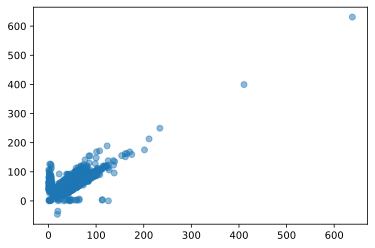

In [49]:
plt.scatter(df_train['LifeSquare'], df_train['Square'] - df_train['KitchenSquare'], alpha=0.5)

Дальнейшее редактирование площадей пока прекратим и заполним **NaN** значения

In [50]:
df_train.loc[df_train['LifeSquare'].isna()]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
28              9    2.0  604.705972         NaN            1.0     17   
29             22    3.0   73.930217         NaN            1.0      4   
32             25    3.0   88.406762         NaN            1.0     21   
53              1    3.0   87.181350         NaN            1.0      6   
55              1    2.0   65.825598         NaN            1.0     16   
...           ...    ...         ...         ...            ...    ...   
16752           1    3.0   79.078673         NaN            1.0      2   
16753          62    3.0   89.573600         NaN            1.0     10   
16757          23    1.0   41.455882         NaN            1.0     11   
16766          58    1.0   49.286054         NaN            1.0      5   
16777          52    2.0   54.496529         NaN            1.0     15   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
28           18.0       1977   0.161532         B         B        25   
29           17.0       1977   0.118537         B         B        30   
32           25.0       2019   0.069753         B         B        53   
53           17.0       1977   0.007122         B         B         1   
55           17.0       1977   0.007122         B         B         1   
...           ...        ...        ...       ...       ...       ...   
16752        17.0       1977   0.007122         B         B         1   
16753         9.0       2014   0.072158         B         B         2   
16757        17.0       1977   0.075779         B         B         6   
16766         3.0       1977   0.437885         B         B        23   
16777        17.0       1977   0.371149         B         B        34   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
28         5648         1          30.0            2        4       B   
29         6207         1        1183.0            1        0       B   
32        13670         4           NaN            1       11       B   
53          264         0           NaN            0        1       B   
55          264         0           NaN            0        1       B   
...         ...       ...           ...          ...      ...     ...   
16752       264         0           NaN            0        1       B   
16753       629         1           NaN            0        0       A   
16757      1437         3           NaN            0        2       B   
16766      5735         3        1084.0            0        5       B   
16777      7065         1         750.0            2        5       B   

               Price  
Id                    
28     187717.242538  
29     202717.174620  
32     323536.766838  
53     246515.982912  
55     223995.669369  
...              ...  
16752  200932.350329  
16753  233681.472368  
16757  116391.102834  
16766  122670.471536  
16777  150775.310273  

[2113 rows x 19 columns]

In [51]:
df_train.loc[df_train['LifeSquare'].isna()]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
28              9    2.0  604.705972         NaN            1.0     17   
29             22    3.0   73.930217         NaN            1.0      4   
32             25    3.0   88.406762         NaN            1.0     21   
53              1    3.0   87.181350         NaN            1.0      6   
55              1    2.0   65.825598         NaN            1.0     16   
...           ...    ...         ...         ...            ...    ...   
16752           1    3.0   79.078673         NaN            1.0      2   
16753          62    3.0   89.573600         NaN            1.0     10   
16757          23    1.0   41.455882         NaN            1.0     11   
16766          58    1.0   49.286054         NaN            1.0      5   
16777          52    2.0   54.496529         NaN            1.0     15   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
28           18.0       1977   0.161532         B         B        25   
29           17.0       1977   0.118537         B         B        30   
32           25.0       2019   0.069753         B         B        53   
53           17.0       1977   0.007122         B         B         1   
55           17.0       1977   0.007122         B         B         1   
...           ...        ...        ...       ...       ...       ...   
16752        17.0       1977   0.007122         B         B         1   
16753         9.0       2014   0.072158         B         B         2   
16757        17.0       1977   0.075779         B         B         6   
16766         3.0       1977   0.437885         B         B        23   
16777        17.0       1977   0.371149         B         B        34   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
28         5648         1          30.0            2        4       B   
29         6207         1        1183.0            1        0       B   
32        13670         4           NaN            1       11       B   
53          264         0           NaN            0        1       B   
55          264         0           NaN            0        1       B   
...         ...       ...           ...          ...      ...     ...   
16752       264         0           NaN            0        1       B   
16753       629         1           NaN            0        0       A   
16757      1437         3           NaN            0        2       B   
16766      5735         3        1084.0            0        5       B   
16777      7065         1         750.0            2        5       B   

               Price  
Id                    
28     187717.242538  
29     202717.174620  
32     323536.766838  
53     246515.982912  
55     223995.669369  
...              ...  
16752  200932.350329  
16753  233681.472368  
16757  116391.102834  
16766  122670.471536  
16777  150775.310273  

[2113 rows x 19 columns]

In [52]:
index = df_train.loc[df_train['LifeSquare'].isna()].index

In [53]:
index

Int64Index([   28,    29,    32,    53,    55,    96,   122,   124,   131,
              135,
            ...
            16695, 16703, 16710, 16711, 16715, 16752, 16753, 16757, 16766,
            16777],
           dtype='int64', name='Id', length=2113)

In [54]:
df_train.loc[index, 'LifeSquare'] = df_train.loc[index, 'Square'] - df_train.loc[index, 'KitchenSquare']

In [55]:
df_train.loc[index]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
28              9    2.0  604.705972  603.705972            1.0     17   
29             22    3.0   73.930217   72.930217            1.0      4   
32             25    3.0   88.406762   87.406762            1.0     21   
53              1    3.0   87.181350   86.181350            1.0      6   
55              1    2.0   65.825598   64.825598            1.0     16   
...           ...    ...         ...         ...            ...    ...   
16752           1    3.0   79.078673   78.078673            1.0      2   
16753          62    3.0   89.573600   88.573600            1.0     10   
16757          23    1.0   41.455882   40.455882            1.0     11   
16766          58    1.0   49.286054   48.286054            1.0      5   
16777          52    2.0   54.496529   53.496529            1.0     15   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
28           18.0       1977   0.161532         B         B        25   
29           17.0       1977   0.118537         B         B        30   
32           25.0       2019   0.069753         B         B        53   
53           17.0       1977   0.007122         B         B         1   
55           17.0       1977   0.007122         B         B         1   
...           ...        ...        ...       ...       ...       ...   
16752        17.0       1977   0.007122         B         B         1   
16753         9.0       2014   0.072158         B         B         2   
16757        17.0       1977   0.075779         B         B         6   
16766         3.0       1977   0.437885         B         B        23   
16777        17.0       1977   0.371149         B         B        34   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
28         5648         1          30.0            2        4       B   
29         6207         1        1183.0            1        0       B   
32        13670         4           NaN            1       11       B   
53          264         0           NaN            0        1       B   
55          264         0           NaN            0        1       B   
...         ...       ...           ...          ...      ...     ...   
16752       264         0           NaN            0        1       B   
16753       629         1           NaN            0        0       A   
16757      1437         3           NaN            0        2       B   
16766      5735         3        1084.0            0        5       B   
16777      7065         1         750.0            2        5       B   

               Price  
Id                    
28     187717.242538  
29     202717.174620  
32     323536.766838  
53     246515.982912  
55     223995.669369  
...              ...  
16752  200932.350329  
16753  233681.472368  
16757  116391.102834  
16766  122670.471536  
16777  150775.310273  

[2113 rows x 19 columns]

Найдем коэффициенты корреляции по признаку **Price**

In [56]:
df_train.corr()['Price'].sort_values()

Ecology_1       -0.058381
HouseYear        0.004305
Social_3         0.074878
HouseFloor       0.088280
Floor            0.128715
Healthcare_1     0.138755
Shops_1          0.180876
Social_2         0.239226
KitchenSquare    0.249259
Helthcare_2      0.253090
Social_1         0.263286
DistrictId       0.265100
LifeSquare       0.272168
Square           0.521015
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

В завершении удалим признак **Healthcare_1** ввиду большого количества пропусков и низкого значения коэффициента корреляции с признаком **Price**

In [57]:
df_train.drop(columns='Healthcare_1', inplace=True)

In [58]:
df_train

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
0               0    1.0  109.144492   84.613939           15.0      6   
2               2    1.0   34.472263   16.069376            5.0      5   
5               5    3.0   57.607965   38.955672            5.0      3   
6               6    1.0   42.466813   40.010160            1.0     14   
10              6    3.0   75.888156   78.324716            1.0     11   
...           ...    ...         ...         ...            ...    ...   
16793          53    1.0   33.258974   19.576423            6.0      6   
16794          29    2.0   45.280336   32.370920            5.0      8   
16796          46    1.0   33.013935   22.277019            6.0      4   
16797          94    3.0   77.325275   48.101669           10.0      7   
16798          22    1.0   39.956966   19.874715            8.0      2   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
0            15.0       2011   0.319809         B         B        25   
2            18.0       1969   0.000000         B         B        33   
5             9.0       1974   0.150818         B         B        16   
6            17.0       2014   0.243205         B         B         5   
10           17.0       2014   0.243205         B         B         5   
...           ...        ...        ...       ...       ...       ...   
16793        12.0       1972   0.313925         B         B        22   
16794         8.0       1967   0.069660         B         B        31   
16796         9.0       1987   0.188784         B         B        31   
16797        16.0       1982   0.282798         B         B        33   
16798        17.0       1989   0.133215         B         B        49   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
Id                                                                      
0          4756        16            5        8       B  289034.391871  
2          7425         1            2        5       B  174548.966339  
5          3433         4            4        5       B  258091.883679  
6          1564         0            0        0       B  127196.762031  
10         1564         0            0        0       B  218500.747041  
...         ...       ...          ...      ...     ...            ...  
16793      4625        11            2       10       B  201307.933649  
16794      6119         4            1        2       B  239503.727371  
16796      6137         4            0        1       B  168233.016477  
16797      8667         2            0        6       B  354690.491271  
16798     11395         3            3        4       A  183467.407815  

[10000 rows x 18 columns]

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
dtypes: flo

In [60]:
df_train.describe().T.round(2)

count       mean        std       min        25%        50%  \
DistrictId     10000.0      50.40      43.59      0.00      20.00      36.00   
Rooms          10000.0       1.89       0.84      0.00       1.00       2.00   
Square         10000.0      56.33      21.04      1.99      41.78      52.53   
LifeSquare     10000.0      40.98      22.31      0.37      25.49      37.04   
KitchenSquare  10000.0       5.85       5.02      0.00       1.00       6.00   
Floor          10000.0       8.53       5.24      1.00       4.00       7.00   
HouseFloor     10000.0      12.61       6.78      0.00       9.00      13.00   
HouseYear      10000.0    3990.17  200500.26   1910.00    1974.00    1977.00   
Ecology_1      10000.0       0.12       0.12      0.00       0.02       0.08   
Social_1       10000.0      24.69      17.53      0.00       6.00      25.00   
Social_2       10000.0    5352.16    4006.80    168.00    1564.00    5285.00   
Social_3       10000.0       8.04      23.83      0.00       0.00       2.00   
Helthcare_2    10000.0       1.32       1.49      0.00       0.00       1.00   
Shops_1        10000.0       4.23       4.81      0.00       1.00       3.00   
Price          10000.0  214138.86   92872.29  59174.78  153872.63  192269.64   

                     75%          max  
DistrictId         75.00       209.00  
Rooms               2.00        19.00  
Square             65.91       641.07  
LifeSquare         49.79       638.16  
KitchenSquare       9.00       123.00  
Floor              12.00        42.00  
HouseFloor         17.00       117.00  
HouseYear        2001.00  20052011.00  
Ecology_1           0.20         0.52  
Social_1           36.00        74.00  
Social_2         7227.00     19083.00  
Social_3            5.00       141.00  
Helthcare_2         2.00         6.00  
Shops_1             6.00        23.00  
Price          249135.46    633233.47

Отредактируем признак **HouseYear**

In [61]:
df_train.loc[df_train['HouseYear'] > 2020]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
10814         109    1.0  37.265070   20.239714            9.0      9   
11607         147    2.0  44.791836   28.360393            5.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
10814        12.0   20052011   0.136330         B         B        30   
11607         9.0       4968   0.319809         B         B        25   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
Id                                                                      
10814      6141        10            3        6       B  254084.534396  
11607      4756        16            5        8       B  243028.603096

Заменим медианным значением

In [62]:
index = df_train.loc[df_train['HouseYear'] > 2020].index

In [63]:
df_train.loc[index, 'HouseYear'] = int(df_train.loc[df_train['HouseYear'] < 2020]['HouseYear'].median())

In [64]:
df_train.loc[[10814, 11607]]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
10814         109    1.0  37.265070   20.239714            9.0      9   
11607         147    2.0  44.791836   28.360393            5.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
10814        12.0       1977   0.136330         B         B        30   
11607         9.0       1977   0.319809         B         B        25   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
Id                                                                      
10814      6141        10            3        6       B  254084.534396  
11607      4756        16            5        8       B  243028.603096

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
dtypes: flo

In [66]:
df_train.corr()['Price'].sort_values()

Ecology_1       -0.058381
HouseYear        0.036574
Social_3         0.074878
HouseFloor       0.088280
Floor            0.128715
Shops_1          0.180876
Social_2         0.239226
KitchenSquare    0.249259
Helthcare_2      0.253090
Social_1         0.263286
DistrictId       0.265100
LifeSquare       0.272168
Square           0.521015
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

##### Преобразуем признаки типа object к числовым эквивалентам

In [67]:
df_train = pd.get_dummies(df_train, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])

In [68]:
df_train

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
0               0    1.0  109.144492   84.613939           15.0      6   
2               2    1.0   34.472263   16.069376            5.0      5   
5               5    3.0   57.607965   38.955672            5.0      3   
6               6    1.0   42.466813   40.010160            1.0     14   
10              6    3.0   75.888156   78.324716            1.0     11   
...           ...    ...         ...         ...            ...    ...   
16793          53    1.0   33.258974   19.576423            6.0      6   
16794          29    2.0   45.280336   32.370920            5.0      8   
16796          46    1.0   33.013935   22.277019            6.0      4   
16797          94    3.0   77.325275   48.101669           10.0      7   
16798          22    1.0   39.956966   19.874715            8.0      2   

       HouseFloor  HouseYear  Ecology_1  Social_1  ...  Social_3  Helthcare_2  \
Id                                                 ...                          
0            15.0       2011   0.319809        25  ...        16            5   
2            18.0       1969   0.000000        33  ...         1            2   
5             9.0       1974   0.150818        16  ...         4            4   
6            17.0       2014   0.243205         5  ...         0            0   
10           17.0       2014   0.243205         5  ...         0            0   
...           ...        ...        ...       ...  ...       ...          ...   
16793        12.0       1972   0.313925        22  ...        11            2   
16794         8.0       1967   0.069660        31  ...         4            1   
16796         9.0       1987   0.188784        31  ...         4            0   
16797        16.0       1982   0.282798        33  ...         2            0   
16798        17.0       1989   0.133215        49  ...         3            3   

       Shops_1          Price  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
Id                                                                     
0            8  289034.391871            0            1            0   
2            5  174548.966339            0            1            0   
5            5  258091.883679            0            1            0   
6            0  127196.762031            0            1            0   
10           0  218500.747041            0            1            0   
...        ...            ...          ...          ...          ...   
16793       10  201307.933649            0            1            0   
16794        2  239503.727371            0            1            0   
16796        1  168233.016477            0            1            0   
16797        6  354690.491271            0            1            0   
16798        4  183467.407815            0            1            0   

       Ecology_3_B  Shops_2_A  Shops_2_B  
Id                                        
0                1          0          1  
2                1          0          1  
5                1          0          1  
6                1          0          1  
10               1          0          1  
...            ...        ...        ...  
16793            1          0          1  
16794            1          0          1  
16796            1          0          1  
16797            1          0          1  
16798            1          1          0  

[10000 rows x 21 columns]

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Helthcare_2    10000 non-null  int64  
 13  Shops_1        10000 non-null  int64  
 14  Price          10000 non-null  float64
 15  Ecology_2_A    10000 non-null  uint8  
 16  Ecology_2_B    10000 non-null  uint8  
 17  Ecology_3_A    10000 non-null  uint8  
 18  Ecolog

##### Выполним обзор тестовых данных

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 16795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: floa

Удалим признак **Healthcare_1**

In [71]:
df_test = df_test.drop(columns='Healthcare_1')

In [72]:
df_test

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
1               1    2.0  83.061098   83.830248            0.0     10   
3               3    1.0  30.185483   14.810573            6.0      4   
4               4    1.0  37.294669   17.165597            8.0      9   
8               8    3.0  83.930342   50.049315            8.0      4   
9               6    1.0  38.800420   42.560690            1.0      3   
...           ...    ...        ...         ...            ...    ...   
16787          55    3.0  78.688848   44.679276            8.0     12   
16788          74    1.0  48.763155   47.209738            1.0      7   
16789         128    2.0  56.856093   30.515712            8.0      9   
16792          26    1.0  36.802779   22.481885            5.0      4   
16795           3    2.0  42.366967   30.429377            5.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1            22.0       1977   0.007122         B         B         1   
3             9.0       1970   0.265089         B         B        37   
4             9.0       1970   0.327018         B         B        12   
8            12.0       2007   0.092291         B         B        21   
9            17.0       2017   0.243205         B         B         5   
...           ...        ...        ...       ...       ...       ...   
16787        14.0       1989   0.041365         B         B        31   
16788        10.0       2015   0.075779         B         B         6   
16789        14.0       1998   0.041116         B         B        53   
16792         9.0       1966   0.000000         B         B        36   
16795         5.0       1968   0.265089         B         B        37   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
1           264         0            0        1       B  
3          5288         0            3        2       B  
4          2270        23            1        0       B  
8          4346         2            1        2       B  
9          1564         0            0        0       B  
...         ...       ...          ...      ...     ...  
16787      5569         0            1        4       B  
16788      1437         3            0        2       B  
16789     14892         4            1        4       B  
16792      6714         2            0        2       B  
16795      5288         0            3        2       B  

[5000 rows x 17 columns]

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 16795
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   object 
dtypes: float64(6), int64(8), object(3)
memory usage: 70

In [74]:
df_test.describe().T.round(2)

count     mean      std      min      25%      50%      75%  \
DistrictId     5000.0    51.28    44.18     0.00    21.00    37.00    77.00   
Rooms          5000.0     1.91     0.84     0.00     1.00     2.00     2.00   
Square         5000.0    56.45    19.09     1.38    41.91    52.92    66.29   
LifeSquare     3959.0    36.16    17.83     0.33    23.09    32.93    45.17   
KitchenSquare  5000.0     5.98     9.95     0.00     1.00     6.00     9.00   
Floor          5000.0     8.63     5.48     1.00     4.00     7.00    12.00   
HouseFloor     5000.0    12.60     6.79     0.00     9.00    12.00    17.00   
HouseYear      5000.0  1984.39    18.57  1908.00  1973.00  1977.00  2000.00   
Ecology_1      5000.0     0.12     0.12     0.00     0.02     0.07     0.20   
Social_1       5000.0    24.93    17.53     0.00     6.00    25.00    36.00   
Social_2       5000.0  5406.90  4026.61   168.00  1564.00  5285.00  7287.00   
Social_3       5000.0     8.26    23.86     0.00     0.00     2.00     5.00   
Helthcare_2    5000.0     1.32     1.48     0.00     0.00     1.00     2.00   
Shops_1        5000.0     4.24     4.78     0.00     1.00     3.00     6.00   

                    max  
DistrictId       212.00  
Rooms             17.00  
Square           223.45  
LifeSquare       303.07  
KitchenSquare    620.00  
Floor             78.00  
HouseFloor        99.00  
HouseYear       2020.00  
Ecology_1          0.52  
Social_1          74.00  
Social_2       19083.00  
Social_3         141.00  
Helthcare_2        6.00  
Shops_1           23.00

In [75]:
df_test.loc[df_test['KitchenSquare'] > 50]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
3341           62    3.0  112.114019  112.247841          112.0      3   
5199           27    2.0   59.054990   61.647531           57.0     13   
5260           73    3.0   69.358242   51.247581           65.0      6   
5428           27    2.0   62.326044         NaN           61.0     12   
8015           27    1.0   66.099096   33.639611           62.0      3   
12612          27    2.0   60.988496   33.646726           60.0      5   
12640           6    2.0   54.629142   31.486308           97.0      4   
14594          11    2.0   42.795304   24.223770          620.0     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
3341          3.0       2017   0.072158         B         B         2   
5199         12.0       2016   0.211401         B         B         9   
5260          6.0       1931   0.042032         B         B        37   
5428         17.0       1977   0.072158         B         B         2   
8015          7.0       2016   0.014058         B         B         1   
12612        17.0       2013   0.072158         B         B         2   
12640        17.0       2015   0.243205         B         B         5   
14594        14.0       1972   0.038693         B         B        28   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
3341        629         1            0        0       A  
5199       1892         0            0        1       B  
5260       6856        84            2        5       B  
5428        629         1            0        0       A  
8015        290         0            0        0       B  
12612       629         1            0        0       A  
12640      1564         0            0        0       B  
14594      6533         1            2        5       B

In [76]:
index = df_test.loc[df_test['KitchenSquare'] > 50].index

In [77]:
df_test.loc[index]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
3341           62    3.0  112.114019  112.247841          112.0      3   
5199           27    2.0   59.054990   61.647531           57.0     13   
5260           73    3.0   69.358242   51.247581           65.0      6   
5428           27    2.0   62.326044         NaN           61.0     12   
8015           27    1.0   66.099096   33.639611           62.0      3   
12612          27    2.0   60.988496   33.646726           60.0      5   
12640           6    2.0   54.629142   31.486308           97.0      4   
14594          11    2.0   42.795304   24.223770          620.0     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
3341          3.0       2017   0.072158         B         B         2   
5199         12.0       2016   0.211401         B         B         9   
5260          6.0       1931   0.042032         B         B        37   
5428         17.0       1977   0.072158         B         B         2   
8015          7.0       2016   0.014058         B         B         1   
12612        17.0       2013   0.072158         B         B         2   
12640        17.0       2015   0.243205         B         B         5   
14594        14.0       1972   0.038693         B         B        28   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
3341        629         1            0        0       A  
5199       1892         0            0        1       B  
5260       6856        84            2        5       B  
5428        629         1            0        0       A  
8015        290         0            0        0       B  
12612       629         1            0        0       A  
12640      1564         0            0        0       B  
14594      6533         1            2        5       B

In [78]:
df_test.loc[5428,'LifeSquare'] = 1.

In [79]:
df_test.loc[index, 'KitchenSquare'] = (df_test.loc[index, 'Square'] - df_test.loc[index, 'LifeSquare']).abs()

In [80]:
df_test.loc[index]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                       
3341           62    3.0  112.114019  112.247841       0.133823      3   
5199           27    2.0   59.054990   61.647531       2.592541     13   
5260           73    3.0   69.358242   51.247581      18.110661      6   
5428           27    2.0   62.326044    1.000000      61.326044     12   
8015           27    1.0   66.099096   33.639611      32.459485      3   
12612          27    2.0   60.988496   33.646726      27.341770      5   
12640           6    2.0   54.629142   31.486308      23.142834      4   
14594          11    2.0   42.795304   24.223770      18.571534     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
3341          3.0       2017   0.072158         B         B         2   
5199         12.0       2016   0.211401         B         B         9   
5260          6.0       1931   0.042032         B         B        37   
5428         17.0       1977   0.072158         B         B         2   
8015          7.0       2016   0.014058         B         B         1   
12612        17.0       2013   0.072158         B         B         2   
12640        17.0       2015   0.243205         B         B         5   
14594        14.0       1972   0.038693         B         B        28   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
3341        629         1            0        0       A  
5199       1892         0            0        1       B  
5260       6856        84            2        5       B  
5428        629         1            0        0       A  
8015        290         0            0        0       B  
12612       629         1            0        0       A  
12640      1564         0            0        0       B  
14594      6533         1            2        5       B

In [81]:
df_test.loc[df_test['LifeSquare'] > 200]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
11533          94    2.0  48.713443  303.071094            6.0      5   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
11533        12.0       1974   0.521867         B         B        25   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
11533      6149         0            0        0       B

In [82]:
df_test.loc[11533, 'LifeSquare'] = df_test.loc[11533, 'Square'] - df_test.loc[11533, 'KitchenSquare']

In [83]:
df_test.loc[11533]

DistrictId             94
Rooms                   2
Square            48.7134
LifeSquare        42.7134
KitchenSquare           6
Floor                   5
HouseFloor             12
HouseYear            1974
Ecology_1        0.521867
Ecology_2               B
Ecology_3               B
Social_1               25
Social_2             6149
Social_3                0
Helthcare_2             0
Shops_1                 0
Shops_2                 B
Name: 11533, dtype: object

In [84]:
df_test.describe().T.round(2)

count     mean      std      min      25%      50%      75%  \
DistrictId     5000.0    51.28    44.18     0.00    21.00    37.00    77.00   
Rooms          5000.0     1.91     0.84     0.00     1.00     2.00     2.00   
Square         5000.0    56.45    19.09     1.38    41.91    52.92    66.29   
LifeSquare     3960.0    36.08    17.32     0.33    23.09    32.92    45.15   
KitchenSquare  5000.0     5.79     4.19     0.00     1.00     6.00     9.00   
Floor          5000.0     8.63     5.48     1.00     4.00     7.00    12.00   
HouseFloor     5000.0    12.60     6.79     0.00     9.00    12.00    17.00   
HouseYear      5000.0  1984.39    18.57  1908.00  1973.00  1977.00  2000.00   
Ecology_1      5000.0     0.12     0.12     0.00     0.02     0.07     0.20   
Social_1       5000.0    24.93    17.53     0.00     6.00    25.00    36.00   
Social_2       5000.0  5406.90  4026.61   168.00  1564.00  5285.00  7287.00   
Social_3       5000.0     8.26    23.86     0.00     0.00     2.00     5.00   
Helthcare_2    5000.0     1.32     1.48     0.00     0.00     1.00     2.00   
Shops_1        5000.0     4.24     4.78     0.00     1.00     3.00     6.00   

                    max  
DistrictId       212.00  
Rooms             17.00  
Square           223.45  
LifeSquare       169.90  
KitchenSquare     61.33  
Floor             78.00  
HouseFloor        99.00  
HouseYear       2020.00  
Ecology_1          0.52  
Social_1          74.00  
Social_2       19083.00  
Social_3         141.00  
Helthcare_2        6.00  
Shops_1           23.00

Заполним **LifeSquare** значениями **Square - KitchenSquare**

In [85]:
index = df_test.loc[df_test['LifeSquare'].isna()].index

In [86]:
df_test.loc[index,'LifeSquare'] = df_test.loc[index,'Square'] - df_test.loc[index, 'KitchenSquare']

In [87]:
df_test.loc[index]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
30             23    2.0  64.418742   63.418742            1.0      8   
54             34    2.0  59.942545   58.942545            1.0      5   
87             23    1.0  37.235587   36.235587            1.0      5   
111             1    2.0  54.645477   53.645477            1.0     15   
130            46    1.0  39.208208   38.208208            1.0     18   
...           ...    ...        ...         ...            ...    ...   
16754          33    2.0  45.643389   45.643389            0.0      4   
16756          27    1.0  44.344949   43.344949            1.0      3   
16764           1    1.0  41.692862   40.692862            1.0      7   
16783          67    3.0  84.331133   83.331133            1.0     11   
16786          23    1.0  44.669161   43.669161            1.0      7   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
30           17.0       1977   0.075779         B         B         6   
54            1.0       1977   0.069753         B         B        53   
87            3.0       1977   0.005767         B         B         1   
111          17.0       1977   0.007122         B         B         1   
130           1.0       1977   0.000000         B         B        47   
...           ...        ...        ...       ...       ...       ...   
16754        16.0       1977   0.236108         B         B        16   
16756         1.0       1977   0.072158         B         B         2   
16764        22.0       1977   0.007122         B         B         1   
16783        22.0       1977   0.007720         B         B        38   
16786        25.0       1977   0.075779         B         B         6   

       Social_2  Social_3  Helthcare_2  Shops_1 Shops_2  
Id                                                       
30         1437         3            0        2       B  
54        13670         4            1       11       B  
87          388         0            0        0       B  
111         264         0            0        1       B  
130       11319         0            3        5       B  
...         ...       ...          ...      ...     ...  
16754      3893        27            3       10       B  
16756       629         1            0        0       A  
16764       264         0            0        1       B  
16783      4788         2            0        4       B  
16786      1437         3            0        2       B  

[1040 rows x 17 columns]

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 16795
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   object 
dtypes: float64(6), int64(8), object(3)
memory usage: 86

##### Преобразуем признаки типа object к числовым эквивалентам

In [89]:
df_test = pd.get_dummies(df_test, columns=['Ecology_2','Ecology_3','Shops_2'])

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 16795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Social_1       5000 non-null   int64  
 10  Social_2       5000 non-null   int64  
 11  Social_3       5000 non-null   int64  
 12  Helthcare_2    5000 non-null   int64  
 13  Shops_1        5000 non-null   int64  
 14  Ecology_2_A    5000 non-null   uint8  
 15  Ecology_2_B    5000 non-null   uint8  
 16  Ecology_3_A    5000 non-null   uint8  
 17  Ecology_3_B    5000 non-null   uint8  
 18  Shops_2

##### Закончим работу с признаками.

### ***

##### Сформируем датасеты

In [91]:
X_train = df_train.drop(columns='Price')
y_train = df_train.loc[:,['Price']]
y_train = y_train.astype('float')

In [92]:
print(X_train.shape)
print(y_train.shape)

(10000, 20)
(10000, 1)


In [93]:
type(X_train)

pandas.core.frame.DataFrame

In [94]:
type(y_train)

pandas.core.frame.DataFrame

In [95]:
X_test = df_test

In [96]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 16798
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   10000 non-null  float64
dtypes: float64(1)
memory usage: 476.2 KB


### RandomForest model

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

In [98]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train.flatten(), y=true_values_train.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test.flatten(), y=true_values_test.flatten())
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [99]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [100]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

##### Выполним кросс-валидацию

In [101]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
print('R2 для случайного леса = ', round(cv_scores.mean(), 3))

R2 для случайного леса =  0.734


##### Выполним экспорт предсказанных значений и загрузим на kaggel

In [102]:
result = pd.DataFrame(y_test_preds, index=X_test.index, columns=['Price'])

In [103]:
result

Price
Id                  
1      244731.150456
3      141267.549051
4      199765.907684
8      341122.883805
9      131996.708469
...              ...
16787  315647.000431
16788  168295.344513
16789  240055.154221
16792  122552.531637
16795  169454.135844

[5000 rows x 1 columns]

In [104]:
result.to_csv('SDKitaev_predictions.csv')

##### Kaggel R2 score: 0.73884